In [1]:
from header import *
plt.rcParams.update({'font.size': 14})

In [2]:
df = read_benchmarks_aggregation('results/aggregated_benchmarks.csv')
df[(df.m == 100) & (df.N==10000) ]

,algo,graph,head,N,m,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,c
0,pasgal,ecoli,10000,10000,100,13.1107,0:00:13,22.38,82.45,12.46,13.61,0.0,0.00,92.73,cornflowerblue
1,pasgal,ecoli,100000,10000,100,101.6403,0:01:41,30.77,91.57,20.82,22.43,0.0,0.00,74.37,cornflowerblue
2,pasgal,ecoli,1000000,10000,100,731.1509,0:12:11,136.64,196.52,126.83,128.45,0.0,0.00,96.48,cornflowerblue
3,pasgal,ecoli,10000000,10000,100,3272.5157,0:54:32,568.15,628.25,558.25,560.16,0.0,0.00,99.53,cornflowerblue
4,astarix,ecoli,10000,10000,100,11.6350,0:00:11,31.74,75.08,24.80,25.28,0.0,3.50,91.94,red
5,astarix,ecoli,100000,10000,100,14.4103,0:00:14,44.18,89.14,37.36,37.87,0.0,3.54,89.24,red
6,astarix,ecoli,1000000,10000,100,24.9215,0:00:24,127.15,214.24,120.10,120.57,0.0,2.02,60.15,red
7,astarix,ecoli,10000000,10000,100,33.1857,0:00:33,671.48,889.21,664.57,665.27,0.0,1.16,45.84,red
8,dijkstra,ecoli,10000,10000,100,18.4403,0:00:18,27.07,70.43,20.13,20.61,0.0,2.91,82.32,darkorange
9,dijkstra,ecoli,100000,10000,100,27.3724,0:00:27,33.12,77.87,26.14,26.83,0.0,2.00,54.50,darkorange


performance_vs_genomesize graphaligner 1.0150031327265898
performance_vs_genomesize dijkstra 0.19079379956105777
performance_vs_genomesize astarix 0.16540389544939982
performance_vs_genomesize pasgal 0.8731905694873399
memory_vs_genomesize graphaligner 0.4718061967656637
memory_vs_genomesize dijkstra 0.38884822485095033
memory_vs_genomesize astarix 0.3013547210464493
memory_vs_genomesize pasgal 0.3928588855762995


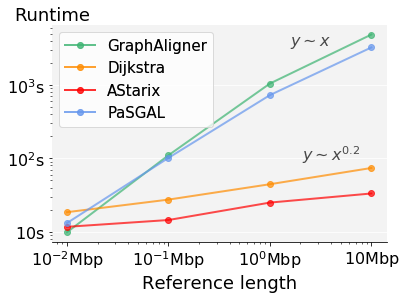

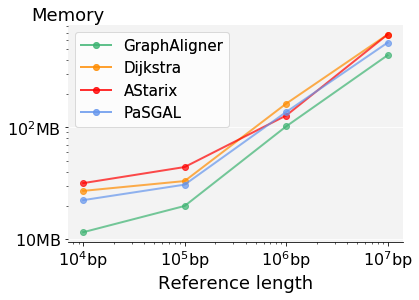

In [57]:
def exper2img(caption, df, x, y, xlog, ylog, **kwargs):
    #print('Draw {} vs {}, ylog={}, kwargs={}'.format(x, y, ylog, kwargs))
           
    df = df.sort_values(['algo', x, 'm'], ascending=[True, True, True])
    
    fig, ax = plt.subplots()
    
    # data
    lines = []
    for algo in df.sort_values('algo').algo.unique():
        for readlen in df.m.unique():
            d = df[(df.algo == algo) & (df.m == readlen)]
            msize=6
            lwidth=2
            #msize = 6.5 if algo == 'astarix' else 6 if algo == 'dijkstra' else 5
            #lwidth = 2 if algo == 'astarix' else 1.5 if algo == 'dijkstra' else 1
            #scatter = ax.scatter(d[x], d[y], c=d['c'], s=d['m']**2/100, label=algo, alpha=0.5, edgecolors='none')
            line, = ax.plot(d[x], d[y], readlen2style(readlen), linestyle='-', c=algo2color(algo),
                            label=algo, alpha=0.7, linewidth=lwidth, markersize=msize)
            lines.append(line)
            #weight = 'bold' if algo == 'astarix' else 'normal'
            #ax.text(d[x].median(), d[y].median(), algo2beautiful(algo), {'color': algo2color(algo), 'fontsize': 15, 'weight': weight}, ha="right", va="top")
            
            logx, logy = list(np.log(d[x])), list(np.log(d[y]))
            p = (logy[-2]-logy[0]) / (logx[-2]-logx[0])
            #a, b = np.polyfit(np.log(d[y]), np.log(d[x]), 1)
            #b = abs(b)
            print(caption,algo,p)
  
    if y == 's':
        ax.text(4, 80, "$y \sim x^{0.2}$", ha='center', va='bottom', size=16, alpha=0.7)
        ax.text(2.5, 3000, "$y \sim x$", ha='center', va='bottom', size=16, alpha=0.7)

    # Legend of algorithm
    algo_leg = ax.legend(lines[::len(df.m.unique())], [algo2beautiful(a) for a in df.sort_values('algo').algo.unique()],
                         loc="upper left", prop={'size': 15}, framealpha=0.5)
    #for lh in algo_leg.legendHandles: 
    #    lh.set_alpha(alpha)
    ax.add_artist(algo_leg)
    # Legend of readlengths
    #handles, labels = scatters[0].legend_elements(prop="sizes", alpha=0.6)
    #legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

    if xlog: ax.set_xscale('log')
    if ylog: ax.set_yscale('log')   # plt.semilogy(basey=2)
    
    # grid
    #ax.margins(x=0) 
    ax.set_facecolor('#F3F3F3')
    ax.grid(True, which='both', alpha=1, color='w')
    ax.grid(False, axis='x', which='both')
    ax.grid(False, axis='y', which='minor')
    
    # labels
    ax.set_xlabel(col2name(x), size=18)  # weight='bold',
    ax.set_ylabel(col2name(y), rotation=0, ha='center', size=18)
    ax.yaxis.set_label_coords(-0.0,1.00)
    
    # spines
    for spine in ["top", "left", "right"]:
        ax.spines[spine].set_visible(False)
    
    # ticks
    ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        #bottom=False,      # ticks along the bottom edge are off
        #left=False,
        #top=False,         # ticks along the top edge are off
        #labelbottom=False,
        labelsize=16,
    ) # labels along the bottom edge are off
    
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda num, pos: myticks(num, pos)+''+col2unit(x)))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda num, pos: myticks(num, pos)+''+col2unit(y)))
    
    fig.savefig('{}-{}x{}.pdf'.format(caption.replace(' ', '_'), x, y), bbox_inches='tight')

df['head_Mbp'] = df['head'] / 10**6
exper2img('performance_vs_genomesize', df[(df.N == 10000) & (df.graph == 'ecoli') & (df.m == 100)], x='head_Mbp', y='s', xlog=True, ylog=True)
exper2img('memory_vs_genomesize', df[(df.N == 10000) & (df.graph == 'ecoli') & (df.m == 100)], x='head', y='max_rss', xlog=True, ylog=True)